In [ ]:
!pip install praat-parselmouth

https://parselmouth.readthedocs.io/en/stable/api_reference.html#parselmouth.Sound

Чтение файла

In [2]:
import parselmouth
sound = parselmouth.Sound("cta0001.wav")

Объект Intensity

In [ ]:
intensity = sound.to_intensity()

Получим времена

In [5]:
from numpy import arange
times = arange(0, sound.xmax, 0.01)

Построим график

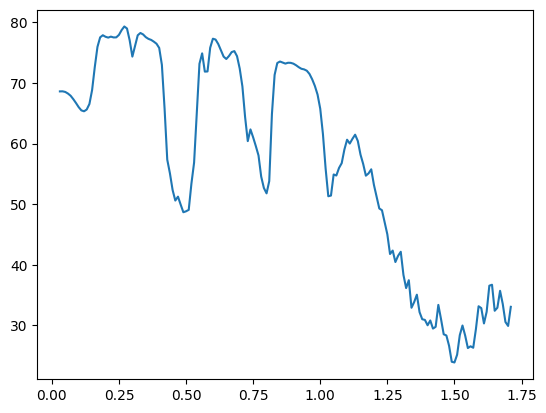

In [9]:
import matplotlib.pyplot as plt
plt.plot(times, [intensity.get_value(i) for i in times])
plt.show()

Сделаем Sound из ndarray

In [7]:
from scipy.io.wavfile import read, write
fs, data = read("cta0001.wav")
new_sound = parselmouth.Sound(values=data, sampling_frequency=fs)

In [20]:
print(new_sound.centre_time) # середина сигнала

0.8738095238095238


Получим объект Pitch

In [16]:
pitch = sound.to_pitch(pitch_ceiling=400)
pitch_vals = [pitch.get_value_at_time(i) for i in times]

In [17]:
print(pitch_vals)

[nan, nan, 157.9299377859113, 154.2208690571565, 152.54858937903603, 153.39506785051486, 153.09002018707832, 151.61690652750275, 149.18896731928353, 147.65105419749332, 147.01101260109877, 147.3580670934425, 149.19153620331085, 153.07824345903967, 160.84876524861266, 176.5207197900817, 196.18662588038512, 215.47688148389116, 235.16925025964815, 254.38565497713643, 271.73617623211635, 282.64133390281745, 289.23072825210096, 296.8582070415528, 306.0437977122131, 314.9168585686077, 320.81731740296647, 323.99948490293576, 324.7928385540928, 321.5257661810458, 317.53472078383237, 319.753975248626, 322.00887791541277, 321.1202418488857, 319.4870863321601, 316.92154571511213, 314.72029654228066, 313.5324092533779, 312.8574283598959, 311.8334531516055, 310.4442303728458, 310.07759078891286, 313.3965410320922, 316.8629299922522, 317.19095148196885, 317.3464303466359, 317.5776727806807, 316.80459321520385, 317.2771562215067, nan, nan, nan, nan, nan, 216.04135687169165, 211.9214687861211, 203.887

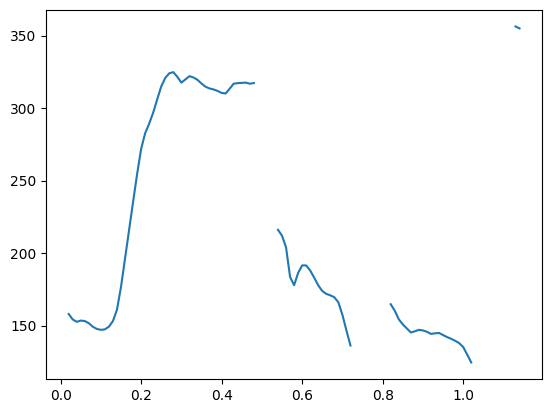

In [18]:
plt.plot(times, pitch_vals)
plt.show()

Получим объект Formant

In [10]:
formants = sound.to_formant_burg()
first_formant = [formants.get_value_at_time(1, i) for i in times]
second_formant = [formants.get_value_at_time(2, i) for i in times]

In [11]:
print(first_formant)

[nan, nan, nan, 266.5474476674229, 276.58143828780334, 241.65927612490506, 214.80565396183968, 200.05386287484134, 190.02464316896305, 185.02952515849094, 187.28804818532058, 190.6841502799275, 195.21274712819152, 194.1779732093989, 205.33297509888746, 217.88434830663954, 238.90159769664007, 253.5938367035523, 288.5460176840204, 313.9483531625616, 308.68971291525185, 310.2586553292613, 302.4979430533348, 306.112558013102, 316.00825999620935, 329.5900654615262, 340.1243463065127, 343.4530826605088, 343.47998698133296, 333.35430582001607, 318.68365612124046, 321.8401233736194, 326.36292367978547, 327.20751296900465, 326.1765806110935, 324.3959791422153, 321.07142148117794, 318.833482707077, 317.46805669735187, 317.8801627326399, 317.2569724909591, 315.37242436080624, 318.4133927407103, 322.5983085724006, 317.36363205781566, 317.96690380162937, 318.94321050034006, 317.8669382145832, 317.3895208980896, 319.1729304364636, 314.3986554948807, 356.54481307912266, 732.9894980895477, 642.3350821

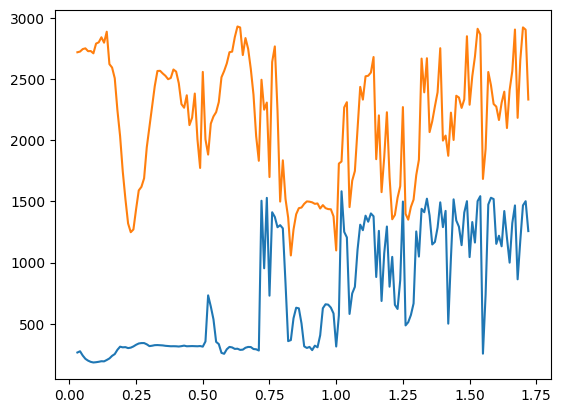

In [12]:
plt.plot(times, first_formant)
plt.plot(times, second_formant)
plt.show()

Задание: прочитать файлы по ссылке. Взять уровень ideal из каждого .TextGrid. Вычислить значения формант для каждого гласного. Построить точечный график зависимости:
1. второй форманты от первой (каждый гласный своим цветом)
2. разницы между формантами (F2 - F1) от первой форманты

In [ ]:
vowels = ["i", "e", r"\as", "o", "u", r"\i-"]

In [ ]:
import os
folder = "/content/drive/MyDrive/fpt1"
os.listdir(folder)

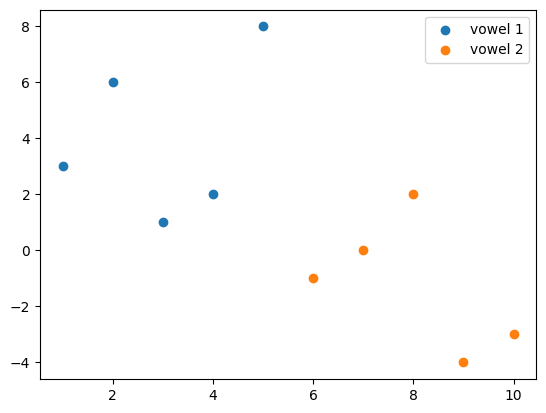

In [23]:
plt.scatter([1, 2, 3, 4, 5], [3, 6, 1, 2, 8], label="vowel 1")
plt.scatter([6, 7, 8, 9, 10], [-1, 0, 2, -4, -3], label="vowel 2")
plt.legend()
plt.show()